## Central Limit Theorem Exercise

In [8]:
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st
import matplotlib.pyplot as plt

/home/kyle/anaconda3/envs/Python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


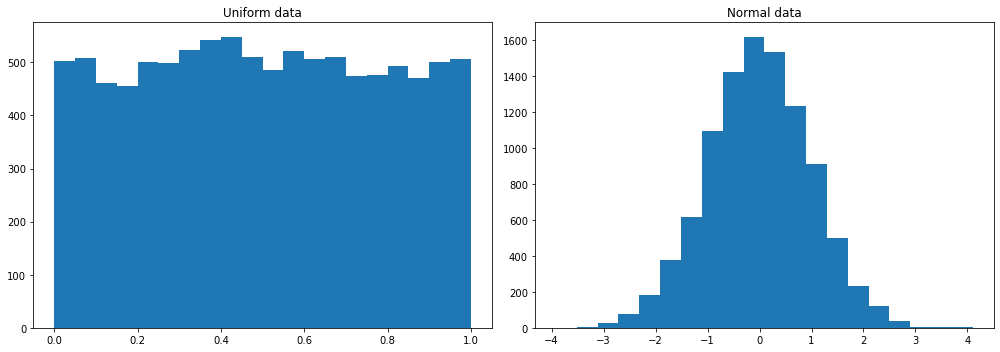

In [9]:
#
uniform = np.random.rand(10000)
normal = np.random.randn(10000)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(uniform, 20)
ax1.set_title('Uniform data')
ax2.hist(normal, 20)
ax2.set_title('Normal data')
fig.tight_layout()
fig.show();

### CLT - simulation

### How many samples do we need to take, so that the distribution of means for these samples will pass the shapiro-wilk test for normality if the population is from a Uniform or a Normal distribution?

+ Assume the population has 10,000 observation.
+ Assume sample size is always 50.

We will be suprised to see how fast the test passes for both distributions.

In [28]:
# Get random sample from population uniform
def get_random_sample(population):
    pop_copy = population.copy()
    np.random.shuffle(pop_copy)
    sample = pop_copy[:50]
    return sample

In [34]:
get_random_sample(uniform)

array([0.11312285, 0.16395467, 0.96204703, 0.93193308, 0.98058094,
       0.78458164, 0.60740261, 0.35179532, 0.50251663, 0.45120772,
       0.71553275, 0.65092153, 0.47918508, 0.50208982, 0.68559648,
       0.69009481, 0.58724992, 0.1719246 , 0.98708522, 0.23926948,
       0.80131883, 0.48188942, 0.55427481, 0.83085997, 0.58021573,
       0.01541601, 0.29470705, 0.57807668, 0.76784786, 0.13029637,
       0.80867498, 0.93450932, 0.97006075, 0.43934179, 0.1510945 ,
       0.11231467, 0.51632596, 0.22047211, 0.20705965, 0.43098509,
       0.84624934, 0.87483286, 0.51583546, 0.80081702, 0.47239113,
       0.79500684, 0.44963997, 0.21284036, 0.55566756, 0.80032389])

In [43]:
def get_mean_list(population, number_of_samples):    
    # create a list to hold the mean of each sample
    mean_list = []

    for x in range(number_of_samples):
        mean_list.append(get_random_sample(population).mean())

    return mean_list


In [44]:
get_mean_list(uniform,3)

[0.5431869111220614, 0.5099397677485993, 0.5316868636123935]

In [45]:
shapiro_test_uniform = st.shapiro(get_mean_list(uniform,3))
shapiro_test_uniform

ShapiroResult(statistic=0.8878632187843323, pvalue=0.3478478193283081)

test passed with 3 samples

In [49]:
shapiro_test_normal = st.shapiro(get_mean_list(normal,3))
shapiro_test_normal

ShapiroResult(statistic=0.9747352600097656, pvalue=0.695135772228241)

test passed with 3 samples